https://py-eddy-tracker.readthedocs.io/en/stable/python_module/02_eddy_identification/pet_eddy_detection.html

Using subset of MIOST from: file:///Users/Gomez023/Postdoc/develop/FaSt-SWOT/SWOT/L4_data/MIOST/2025-02-10_SWOT_L4_MIOST_test02.ipynb

In [1]:
# venv_py_eddy_tracker_05


In [1]:
from datetime import datetime

from matplotlib import pyplot as plt
from numpy import arange

from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset

import cartopy.crs as ccrs


In [2]:
from py_eddy_tracker.observations.observation import EddiesObservations


In [3]:
from glob import glob
import os
import numpy as np

In [5]:
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))

In [6]:
# indir_duacs_nrt = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/"
# fname = "cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_1741197895707.nc"
# ds_duacs_nrt_apr = xr.open_dataset(indir_duacs_nrt + fname)

indir_miost = "/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/"
outdir = indir_miost + 'subset/'
outname = "dt_global_allsat_phy_l4_20240401_sub.nc"

In [7]:
data_paths = sorted(glob(outdir + "dt_global_allsat_phy_l4_202404*_sub.nc"))
data_paths

['/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/subset/dt_global_allsat_phy_l4_20240401_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/subset/dt_global_allsat_phy_l4_20240402_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/subset/dt_global_allsat_phy_l4_20240403_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/subset/dt_global_allsat_phy_l4_20240404_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/subset/dt_global_allsat_phy_l4_20240405_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/subset/dt_global_allsat_phy_l4_20240406_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_avi

In [8]:
outdir = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/"

In [9]:
data_path  = data_paths[19]
data_path

'/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/subset/dt_global_allsat_phy_l4_20240420_sub.nc'

In [10]:
# for data_path in data_paths:
g = RegularGridDataset(data_path, "longitude", "latitude")
g.add_uv("adt")
g.bessel_high_filter("adt", 500)
date = datetime(int(data_path[-15:-11]), int(data_path[-11:-9]),
                int(data_path[-9:-7]))
print(date)
# a, c = g.eddy_identification("adt", "u", "v", date , 0.002, shape_error=55)
a_name = outdir + 'a_MIOST_' + date.strftime('%Y%m%d')+'.nc'
c_name = outdir + 'c_MIOST_' + date.strftime('%Y%m%d')+'.nc'
# a.write_file(filename = a_name)
# c.write_file(filename = c_name)
print(a_name)
    

We assume pixel position of grid is centered for /Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v1.0/miost/subset/dt_global_allsat_phy_l4_20240420_sub.nc


/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/py_eddy_tracker/dataset/grid.py:415: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  self.vars[y_name] = h.variables[y_name][sl_y]


2024-04-20 00:00:00
/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_20240420.nc


# add name below!!!

# Checking one output file:

## Load data:

https://py-eddy-tracker.readthedocs.io/en/latest/python_module/02_eddy_identification/pet_interp_grid_on_dataset.html

In [11]:
a_MIOST_20240420 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_20240420.nc")
c_MIOST_20240420 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/c_MIOST_20240420.nc")

File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'
File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'


In [12]:
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes_map(title):
    fig = plt.figure(figsize=(11, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94], projection=ccrs.PlateCarree())

    ax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")

    # Add coastlines and grid lines
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True);     
    gl.top_labels = False; gl.right_labels = False

    return ax

In [13]:
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes_map_subplots(title, nax): 
    """
    title = "xx ()"
    nax, e.g. 121
    """
    # plt.figure(figsize=(14,5)) #(17,5)
    ax = plt.subplot(nax, projection=ccrs.PlateCarree())
    # ax = fig.add_axes([0.03, 0.03, 0.90, 0.94], projection=ccrs.PlateCarree())

    ax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")

    # Add coastlines and grid lines
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True);     
    gl.top_labels = False; gl.right_labels = False

    return ax

# Comp. MIOST and DUACS radius:

## Load DUACS-NRT:

In [14]:
indir_duacs_nrt = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/"

data_paths_DUACS_NRT = sorted(glob(indir_duacs_nrt + "wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_202404*_sub.nc"))
data_paths_DUACS_NRT

['/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20240401_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20240402_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20240403_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20240404_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20240405_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20240406_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_ph

In [15]:
data_path_DUACS_NRT = data_paths_DUACS_NRT[19]

In [16]:
data_path_DUACS_NRT

'/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20240420_sub.nc'

In [17]:
# for data_path_DUACS_NRT in data_paths_DUACS_NRT:
g_DUACS_NRT = RegularGridDataset(data_path_DUACS_NRT, "longitude", "latitude")
g_DUACS_NRT.add_uv("adt")
g_DUACS_NRT.bessel_high_filter("adt", 500)
# date = datetime(int(data_path_DUACS_NRT[-15:-11]), int(data_path_DUACS_NRT[-11:-9]),
#                 int(data_path_DUACS_NRT[-9:-7]))
# print(date)
# a, c = g.eddy_identification("adt", "u", "v", date , 0.002, shape_error=55)
a_name_DUACS_NRT = outdir + 'a_DUACS-NRT_' + date.strftime('%Y%m%d')+'.nc'
c_name_DUACS_NRT = outdir + 'c_DUACS-NRT_' + date.strftime('%Y%m%d')+'.nc'
# a.write_file(filename = a_name)
# c.write_file(filename = c_name)
print(a_name_DUACS_NRT)

We assume pixel position of grid is centered for /Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20240420_sub.nc


/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20240420.nc


In [18]:
a_DUACS_NRT_20240420 = EddiesObservations.load_file(a_name_DUACS_NRT)
c_DUACS_NRT_20240420 = EddiesObservations.load_file(c_name_DUACS_NRT)


File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'
File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'


In [19]:
a_name_DUACS_NRT

'/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20240420.nc'

In [20]:
merge_MIOST_20240420 = a_MIOST_20240420.merge(c_MIOST_20240420)
merge_DUACS_NRT_20240420 = a_DUACS_NRT_20240420.merge(c_DUACS_NRT_20240420)

## Maybe best to match in order to compare:

# EKE:

https://py-eddy-tracker.readthedocs.io/en/latest/python_module/02_eddy_identification/pet_interp_grid_on_dataset.html

In [21]:
aviso_map = g
DUACS_map = g_DUACS_NRT

In [22]:
aviso_map.grid("u") # what does this do exactly? it is the ugos variable or re-derives from adt??

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

## Compute and store eke in cm²/s²

In [23]:
aviso_map.add_grid(
    "eke", (aviso_map.grid("u") ** 2 + aviso_map.grid("v") ** 2) * 0.5 * (100**2)
)

In [24]:
DUACS_map.add_grid(
    "eke", (DUACS_map.grid("u") ** 2 + DUACS_map.grid("v") ** 2) * 0.5 * (100**2)
)

In [25]:
eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())


## Get mean of eke in each effective contour

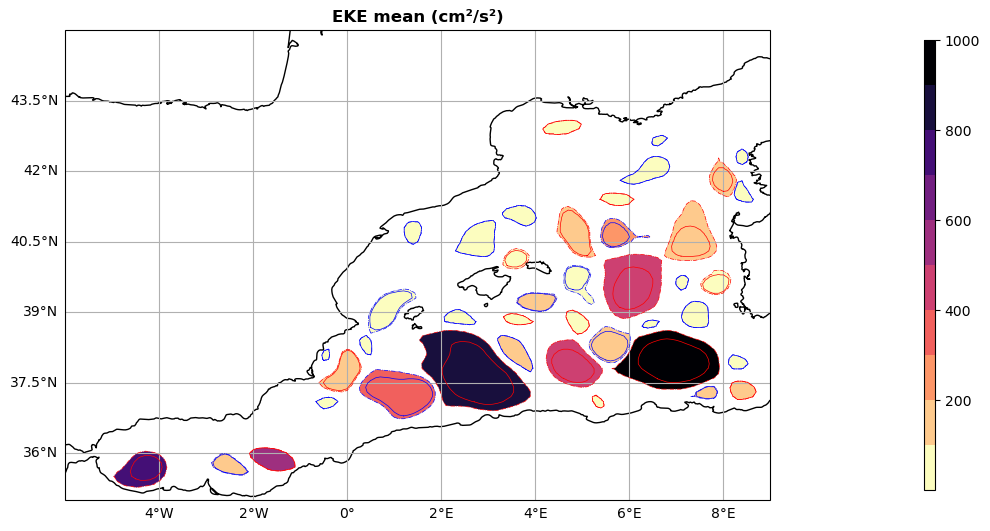

In [26]:
ax = start_axes_map("EKE mean (cm²/s²)")
a_MIOST_20240420.display(ax, color="r", linewidth=0.5, label="Anticyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree())
c_MIOST_20240420.display(ax, color="b", linewidth=0.5, label="Cyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree())

eke_a = a_MIOST_20240420.interp_grid(aviso_map, "eke", method="mean", intern=False)

a_MIOST_20240420.filled(ax, eke_a, ref=-10, **eke_kwargs)

eke_c = c_MIOST_20240420.interp_grid(aviso_map, "eke", method="mean", intern=False)

m = c_MIOST_20240420.filled(ax, eke_c, ref=-10, **eke_kwargs)

update_axes(ax, m)

# --> weird to look at mean no ?
    * what is distribution of EKE values?
    * for thos that high EKE is btw 2 eddies for example?

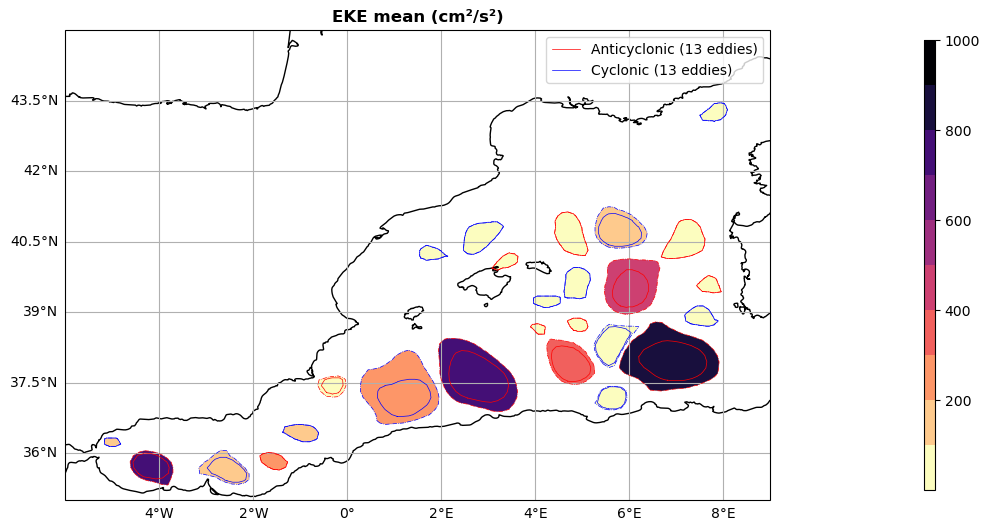

In [27]:
ax = start_axes_map("EKE mean (cm²/s²)")
a_DUACS_NRT_20240420.display(ax, color="r", linewidth=0.5, label="Anticyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.display(ax, color="b", linewidth=0.5, label="Cyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree())

eke_a_DUACS_NRT = a_DUACS_NRT_20240420.interp_grid(DUACS_map, "eke", method="mean", intern=False)

a_DUACS_NRT_20240420.filled(ax, eke_a_DUACS_NRT, ref=-10, **eke_kwargs)

eke_c_DUACS_NRT = c_DUACS_NRT_20240420.interp_grid(DUACS_map, "eke", method="mean", intern=False)

m = c_DUACS_NRT_20240420.filled(ax, eke_c_DUACS_NRT, ref=-10, **eke_kwargs)

update_axes(ax, m)
ax.legend()

# Better with merged matched:

## Merge:

In [28]:
merge_m = a_MIOST_20240420.merge(c_MIOST_20240420)
merge_d = a_DUACS_NRT_20240420.merge(c_DUACS_NRT_20240420)

## Match:

In [29]:
i_, j_, c = merge_m.match(merge_d, cmin=0.1)

In [30]:
ia_, ja_, ca = a_MIOST_20240420.match(a_DUACS_NRT_20240420, cmin=0.1)
ic_, jc_, cc = c_MIOST_20240420.match(c_DUACS_NRT_20240420, cmin=0.1)

# EKE:

## Showing matching eddies:

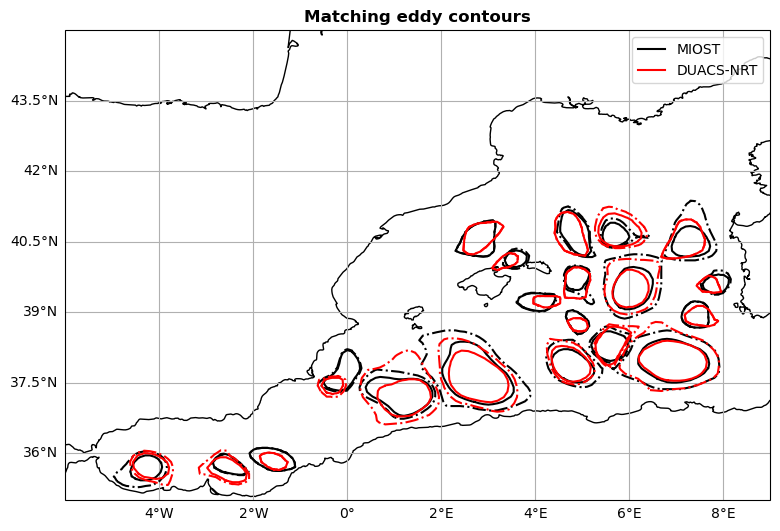

In [31]:
kwargs_m = dict(lw=1.5, label="MIOST", ref=-10, color="k", transform=ccrs.PlateCarree())
kwargs_d = dict(lw=1.5, label="DUACS-NRT", ref=-10, color="r", transform=ccrs.PlateCarree())

ax = start_axes_map("Matching eddy contours")

merge_m.index(i_).display(ax, **kwargs_m)
merge_d.index(j_).display(ax, **kwargs_d)
ax.legend()
# update_axes(ax, mappable)

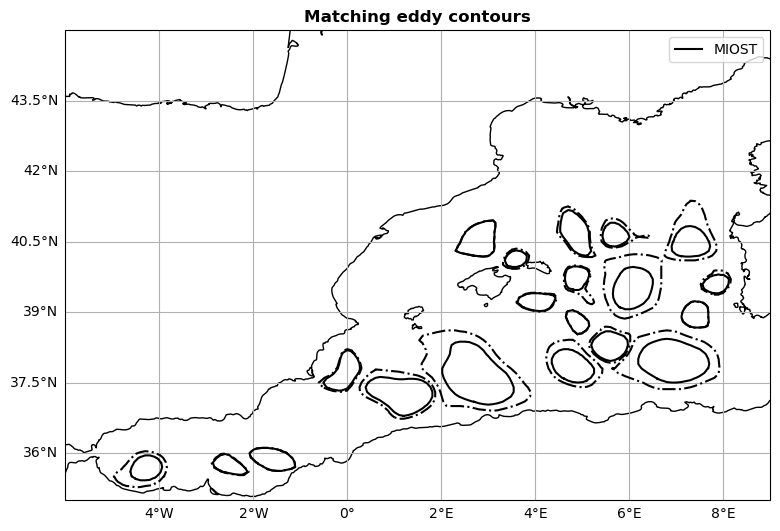

In [32]:
kwargs_m = dict(lw=1.5, label="MIOST", ref=-10, color="k", transform=ccrs.PlateCarree())
kwargs_d = dict(lw=1.5, label="DUACS-NRT", ref=-10, color="r", transform=ccrs.PlateCarree())

ax = start_axes_map("Matching eddy contours")

mm = merge_m.index(i_)
if mm.sign_type == 1: ## 
    mm.display(ax, **kwargs_m)
# merge_d.index(j_).display(ax, **kwargs_d)
ax.legend()
# update_axes(ax, mappable)

In [33]:
mm.sign_type

1

# --> notify problem!!

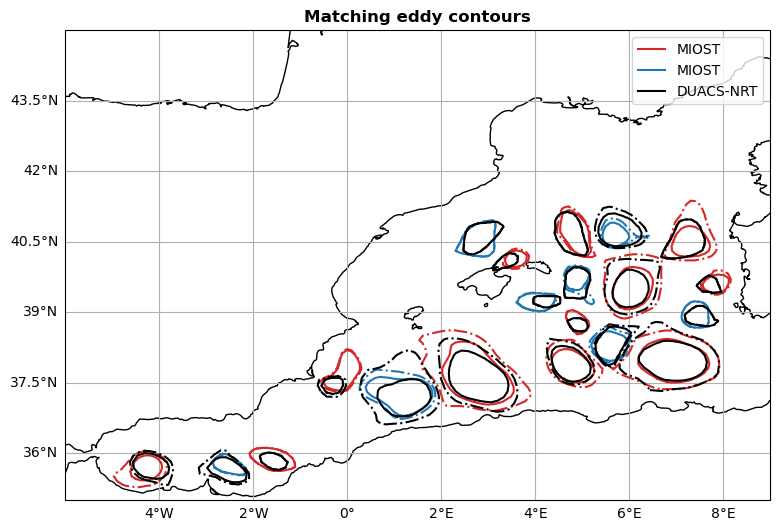

In [34]:
kwargs_m = dict(lw=1.5, label="MIOST", ref=-10, color="C3", transform=ccrs.PlateCarree())
kwargs_d = dict(lw=1.5, label="DUACS-NRT", ref=-10, color="k", transform=ccrs.PlateCarree())

ax = start_axes_map("Matching eddy contours")

a_MIOST_20240420.index(ia_).display(ax, **kwargs_m)
c_MIOST_20240420.index(ic_).display(ax, lw=1.5, label="MIOST", ref=-10, color="C0", transform=ccrs.PlateCarree())

merge_d.index(j_).display(ax, **kwargs_d)
ax.legend()
# update_axes(ax, mappable)

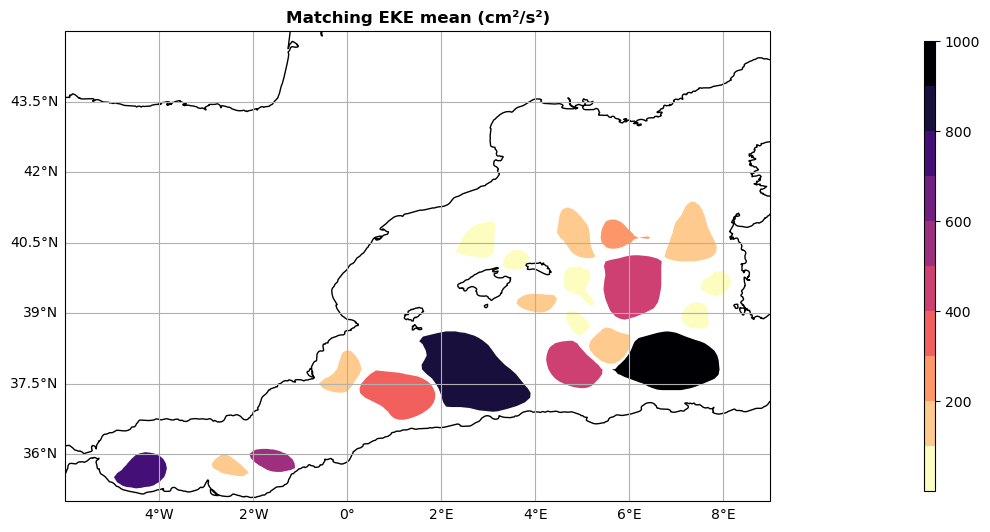

In [35]:
ax = start_axes_map("Matching EKE mean (cm²/s²)")

eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

eke_merged_m = merge_m.index(i_).interp_grid(aviso_map, "eke", method="mean", intern=False)
m = merge_m.index(i_).filled(ax, eke_merged_m, ref=-10, **eke_kwargs)

update_axes(ax, m)
# ax.legend()

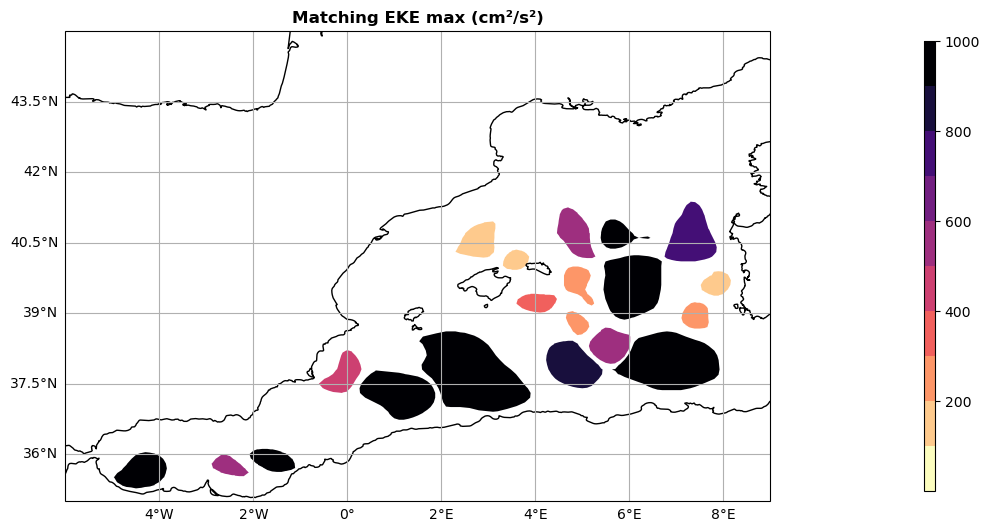

In [36]:
ax = start_axes_map("Matching EKE max (cm²/s²)")

eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

eke_merged_m_max = merge_m.index(i_).interp_grid(aviso_map, "eke", method="max", intern=False)
m = merge_m.index(i_).filled(ax, eke_merged_m_max, ref=-10, **eke_kwargs)

update_axes(ax, m)
# ax.legend()

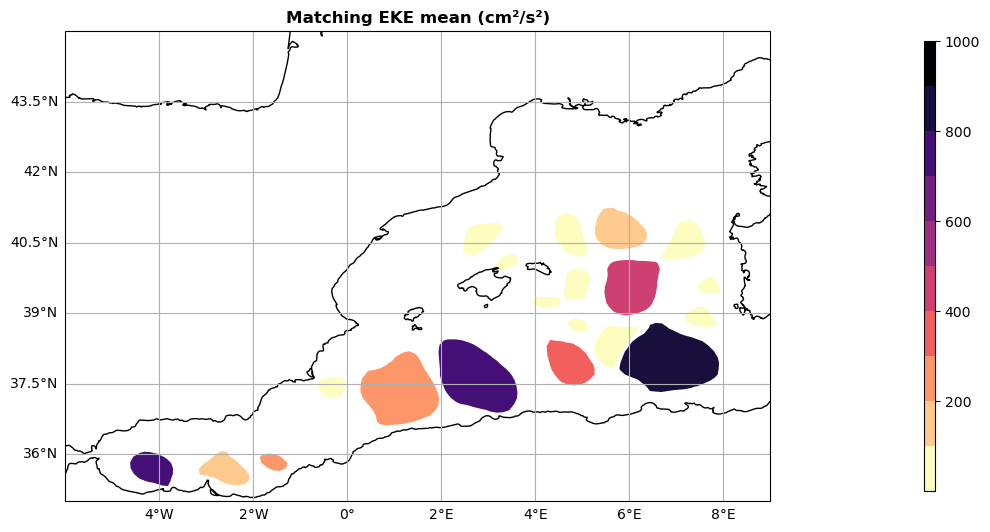

In [37]:
ax = start_axes_map("Matching EKE mean (cm²/s²)")

eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

eke_merged_d = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d, ref=-10, **eke_kwargs)

update_axes(ax, m) 


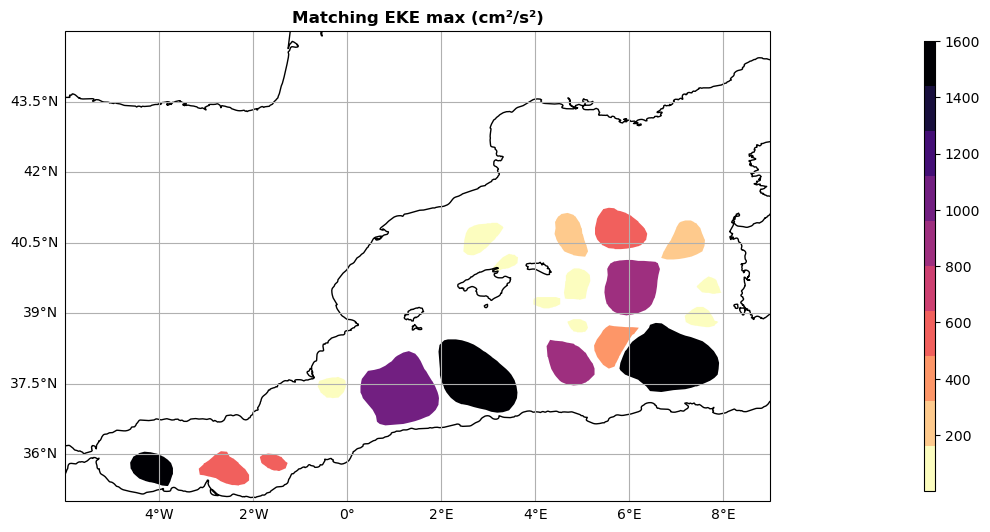

In [38]:
ax = start_axes_map("Matching EKE max (cm²/s²)")

eke_kwargs = dict(vmin=1, vmax=1600, cmap="magma_r", transform=ccrs.PlateCarree())

eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="max", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)

update_axes(ax, m)


# Gridspec plot:

In [39]:
import matplotlib.gridspec   as gridspec


In [40]:
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes_map_subplots_s(title, nax): 
    """
    title = "xx ()"
    nax, e.g. 121
    """
    # plt.figure(figsize=(14,5)) #(17,5)
    # ax = plt.subplot(nax, projection=ccrs.PlateCarree())
    # ax = fig.add_axes([0.03, 0.03, 0.90, 0.94], projection=ccrs.PlateCarree())

    nax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    nax.set_aspect("equal")
    nax.set_title(title, weight="bold")

    # Add coastlines and grid lines
    nax.coastlines()
    gl = ax.gridlines(draw_labels=True);     
    gl.top_labels = False; gl.right_labels = False

    return ax

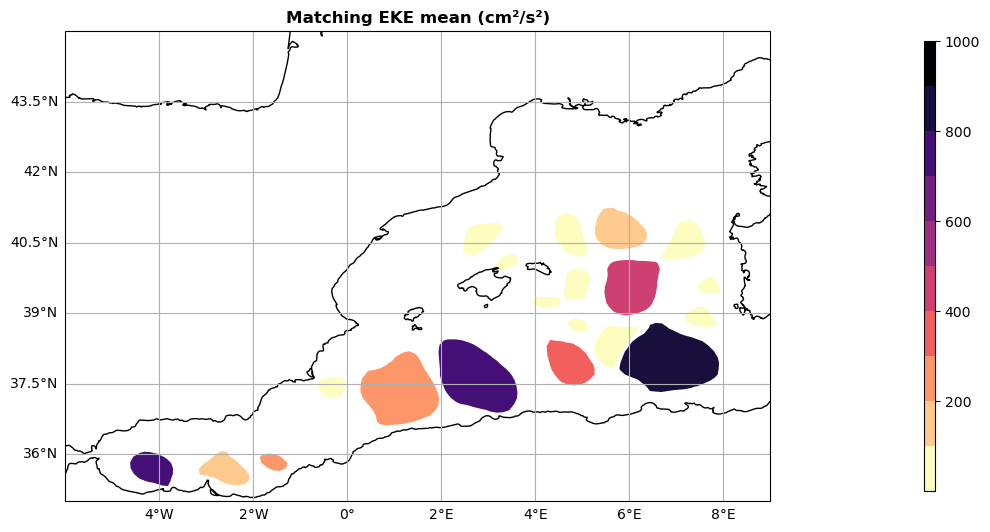

In [41]:
ax = start_axes_map("Matching EKE mean (cm²/s²)")

eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

eke_merged_d = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d, ref=-10, **eke_kwargs)

update_axes(ax, m) 


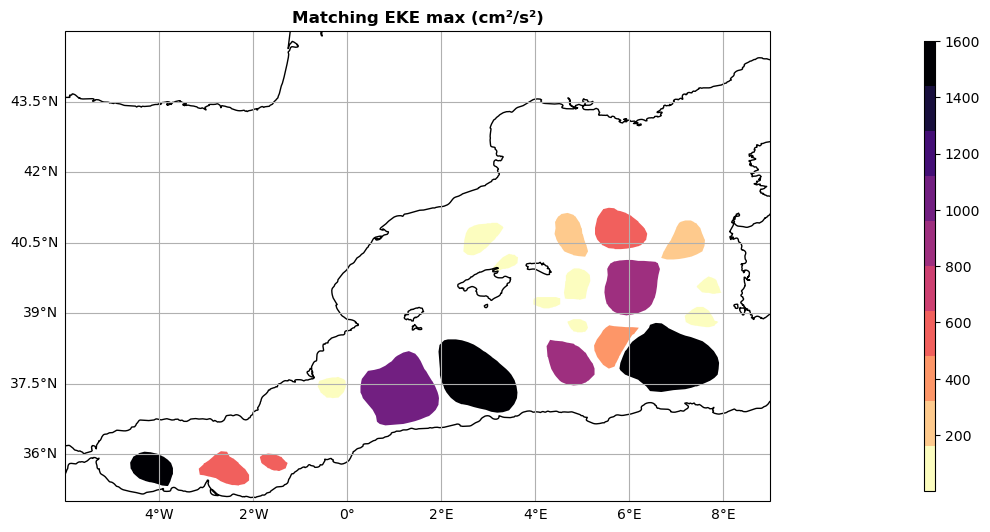

In [42]:
ax = start_axes_map("Matching EKE max (cm²/s²)")

eke_kwargs = dict(vmin=1, vmax=1600, cmap="magma_r", transform=ccrs.PlateCarree())

eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="max", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)

update_axes(ax, m)


# More things in original notebook, look at the pwpt: 20250612_OSR_new-SLTAC

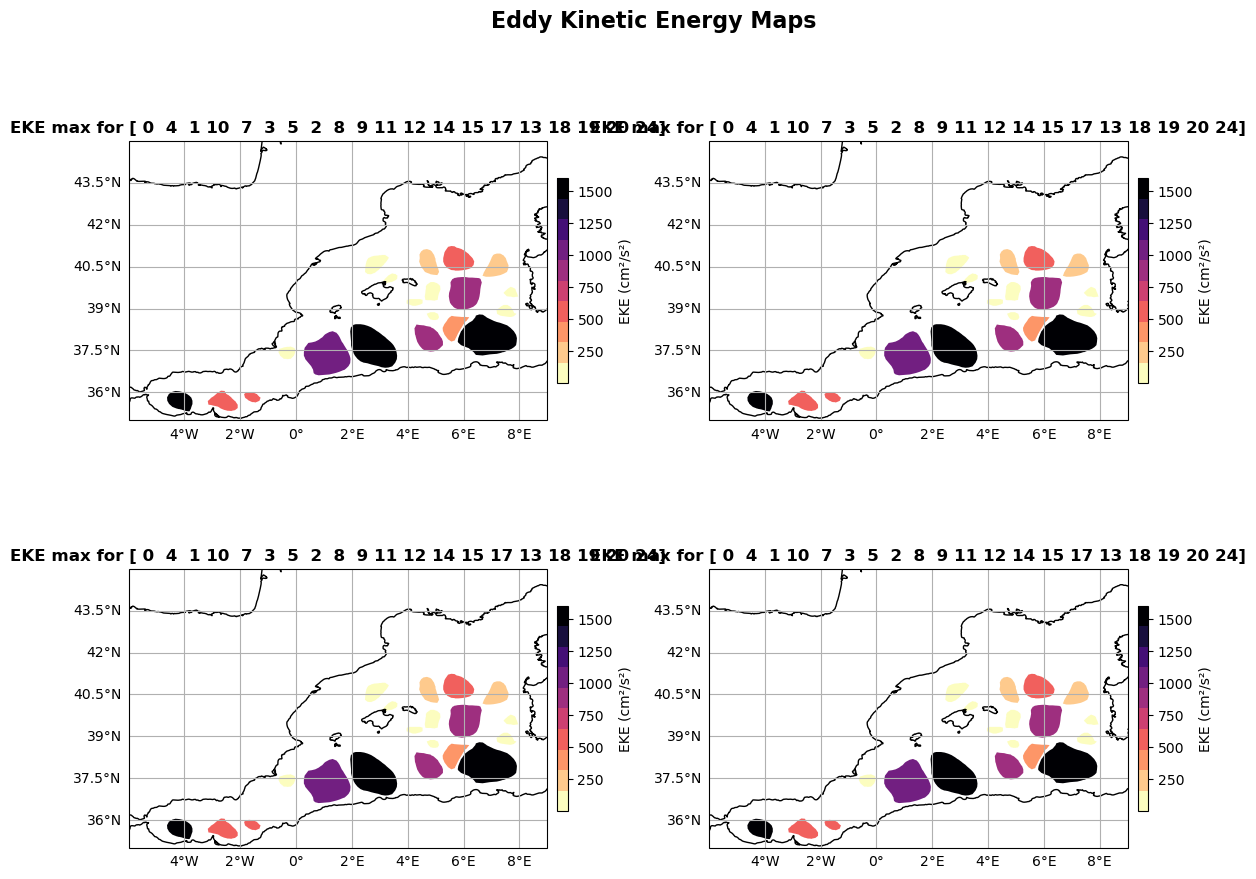

In [43]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

# Constants for map limits
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes_map_gridspec(fig, position, title):
    """
    Create one map in a specific gridspec position.
    """
    ax = fig.add_subplot(position, projection=ccrs.PlateCarree())
    ax.set_xlim(lon_min_ax, lon_max_ax)
    ax.set_ylim(lat_min_ax, lat_max_ax)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold", fontsize=12)
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    return ax

def update_axes_gridspec(ax, mappable, fig):
    """
    Add colorbar for each subplot map.
    """
    cb = fig.colorbar(mappable, ax=ax, orientation='vertical', shrink=0.6, pad=0.02)
    cb.set_label('EKE (cm²/s²)', fontsize=10)

# Example usage with 2x2 plots:
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, wspace=0.15, hspace=0.25)

# Dummy list of j_ values for illustration
j_list = [j_, j_, j_, j_]  # replace with your actual keys or time steps

eke_kwargs = dict(vmin=1, vmax=1600, cmap="magma_r", transform=ccrs.PlateCarree())

for idx, j_ in enumerate(j_list):
    ax = start_axes_map_gridspec(fig, gs[idx], f"EKE max for {j_}")
    eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="max", intern=False)
    m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
    update_axes_gridspec(ax, m, fig)

plt.suptitle("Eddy Kinetic Energy Maps", fontsize=16, weight='bold')
plt.show()


# Nice!

In [44]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy
# Map boundaries
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes_map_gridspec(fig, position, title, right_gl=False, top_gl=False):
    """
    Create a map axis at the specified gridspec position with consistent styling.
    """
    ax = fig.add_subplot(position, projection=ccrs.PlateCarree())
    ax.set_xlim(lon_min_ax, lon_max_ax)
    ax.set_ylim(lat_min_ax, lat_max_ax)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold", fontsize=11)
    ax.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'], zorder=2) #'k') #cartopy.feature.COLORS['land'])
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    if right_gl:
        gl.left_labels = False
    if top_gl:
        gl.bottom_labels = False

    return ax


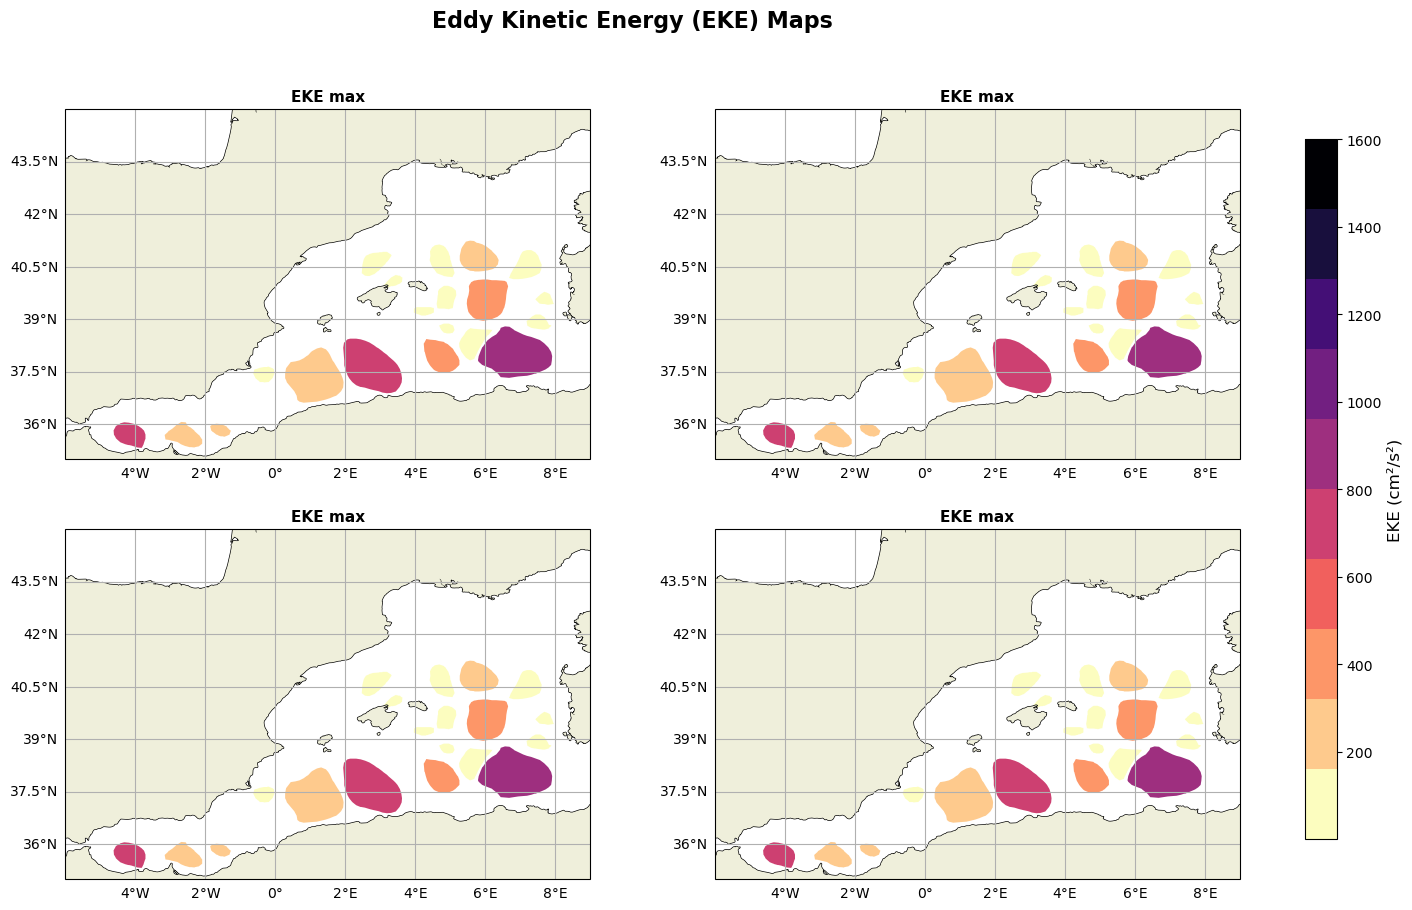

In [45]:

# Prepare the figure and gridspec
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1], wspace=0.1, hspace=0.2)

# Example list of eddy time steps or identifiers
j_list = [j_, j_, j_, j_]  # Replace with your actual keys
eke_kwargs = dict(vmin=1, vmax=1600, cmap="magma_r", transform=ccrs.PlateCarree())

# Store the last mappable for the shared colorbar
mappables = []

for idx, j_ in enumerate(j_list):
    ax = start_axes_map_gridspec(fig, gs[idx], f"EKE max")
    eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
    m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
    mappables.append(m)

# Add a shared colorbar on the right side of all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = fig.colorbar(mappables[-1], cax=cbar_ax)
cb.set_label('EKE (cm²/s²)', fontsize=12)

# Add a common figure title
plt.suptitle("Eddy Kinetic Energy (EKE) Maps", fontsize=16, weight='bold')
plt.show()


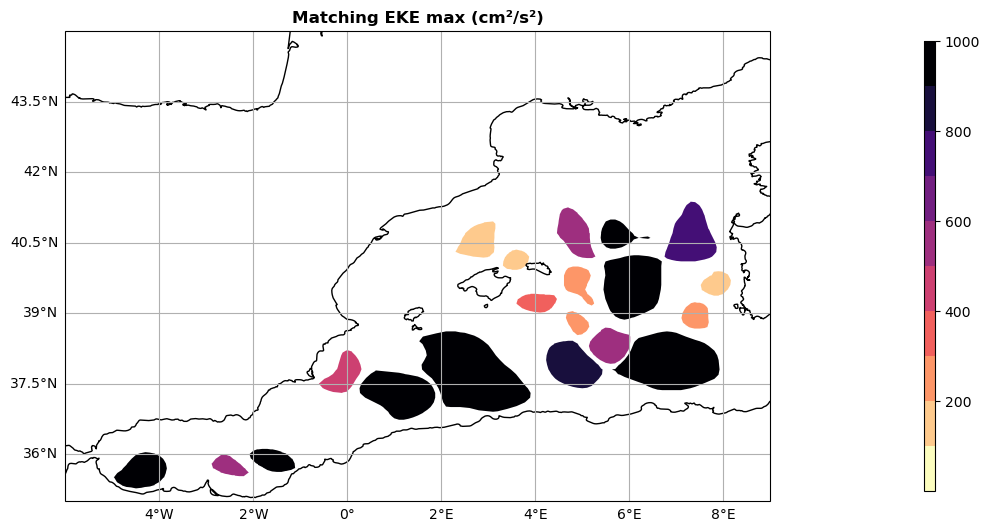

In [46]:
ax = start_axes_map("Matching EKE max (cm²/s²)")

eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

eke_merged_m_max = merge_m.index(i_).interp_grid(aviso_map, "eke", method="max", intern=False)
m = merge_m.index(i_).filled(ax, eke_merged_m_max, ref=-10, **eke_kwargs)

update_axes(ax, m)
# ax.legend()

# Merged mean:

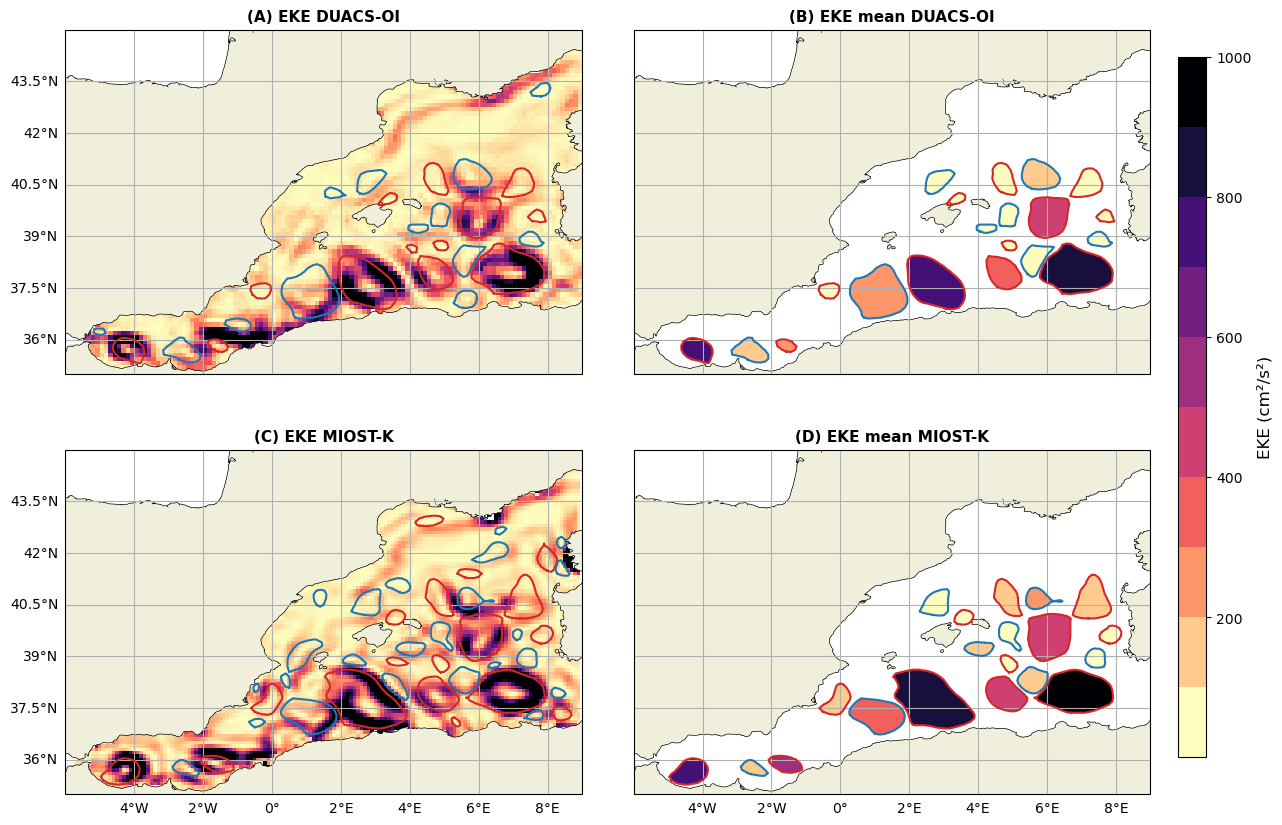

In [47]:
# Prepare the figure and gridspec
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1], wspace=0.1, hspace=0.2)

# Example list of eddy time steps or identifiers
j_list = [j_, j_, j_, j_]  # Replace with your actual keys
eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

# Store the last mappable for the shared colorbar
mappables = []

# for idx, j_ in enumerate(j_list):
#     print(idx)
########### 1
ax = start_axes_map_gridspec(fig, gs[0], f"(A) EKE DUACS-OI", top_gl=True)
# eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
# m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
# mappables.append(m)
m = DUACS_map.display(ax, "eke", **eke_kwargs)
a_DUACS_NRT_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

########### 2
ax = start_axes_map_gridspec(fig, gs[1], f"(B) EKE mean DUACS-OI", right_gl=True, top_gl=True)
a_DUACS_NRT_20240420.index(ja_).display(ax, color="C3", linestyle='-', lw=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.index(jc_).display(ax, color="C0", linestyle='-', lw=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

eke_merged_d = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
mappables.append(m)

########### 3
ax = start_axes_map_gridspec(fig, gs[2], f"(C) EKE MIOST-K")
# eke_merged_m_max = merge_m.index(i_).interp_grid(aviso_map, "eke", method="mean", intern=False)
# m = merge_m.index(i_).filled(ax, eke_merged_m_max, ref=-10, **eke_kwargs)
# mappables.append(m)
m = aviso_map.display(ax, "eke", **eke_kwargs)
a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_MIOST_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

########### 4
ax = start_axes_map_gridspec(fig, gs[3], f"(D) EKE mean MIOST-K", right_gl=True)
# a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True)
a_MIOST_20240420.index(ia_).display(ax, color="C3", linestyle='-', lw=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_MIOST_20240420.index(ic_).display(ax, color="C0", linestyle='-', lw=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

eke_merged_m = merge_m.index(i_).interp_grid(aviso_map, "eke", method="mean", intern=False)
m = merge_m.index(i_).filled(ax, eke_merged_m, ref=-10, **eke_kwargs)
mappables.append(m)

# ax.text(0.98, 0.02, '20/04/2024', transform=ax.transAxes,
#                 fontsize=10, ha='right', va='bottom',
#                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

########################################################################
# Add a shared colorbar on the right side of all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = fig.colorbar(mappables[-1], cax=cbar_ax)
cb.set_label('EKE (cm²/s²)', fontsize=12)

# Add a common figure title
# plt.suptitle("Eddy Kinetic Energy (EKE) Maps", fontsize=16, weight='bold')
plt.show()

# Joint plot:

In [48]:
from datetime import datetime, timedelta

start_date = datetime.strptime("2023-08-01", "%Y-%m-%d")
end_date = datetime.strptime("2024-05-31", "%Y-%m-%d")
ndays = (end_date - start_date).days + 1

ndates = [start_date + timedelta(days=i) for i in range(ndays)]
ndates

[datetime.datetime(2023, 8, 1, 0, 0),
 datetime.datetime(2023, 8, 2, 0, 0),
 datetime.datetime(2023, 8, 3, 0, 0),
 datetime.datetime(2023, 8, 4, 0, 0),
 datetime.datetime(2023, 8, 5, 0, 0),
 datetime.datetime(2023, 8, 6, 0, 0),
 datetime.datetime(2023, 8, 7, 0, 0),
 datetime.datetime(2023, 8, 8, 0, 0),
 datetime.datetime(2023, 8, 9, 0, 0),
 datetime.datetime(2023, 8, 10, 0, 0),
 datetime.datetime(2023, 8, 11, 0, 0),
 datetime.datetime(2023, 8, 12, 0, 0),
 datetime.datetime(2023, 8, 13, 0, 0),
 datetime.datetime(2023, 8, 14, 0, 0),
 datetime.datetime(2023, 8, 15, 0, 0),
 datetime.datetime(2023, 8, 16, 0, 0),
 datetime.datetime(2023, 8, 17, 0, 0),
 datetime.datetime(2023, 8, 18, 0, 0),
 datetime.datetime(2023, 8, 19, 0, 0),
 datetime.datetime(2023, 8, 20, 0, 0),
 datetime.datetime(2023, 8, 21, 0, 0),
 datetime.datetime(2023, 8, 22, 0, 0),
 datetime.datetime(2023, 8, 23, 0, 0),
 datetime.datetime(2023, 8, 24, 0, 0),
 datetime.datetime(2023, 8, 25, 0, 0),
 datetime.datetime(2023, 8, 26, 0,

In [49]:
outdir = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/"

In [50]:
indir_duacs_nrt = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/"

data_paths_DUACS_NRT = sorted(glob(indir_duacs_nrt + "wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_202*_sub.nc"))

In [51]:
a_names_DUACS_NRT = []
c_names_DUACS_NRT = []

for data_path_DUACS_NRT in data_paths_DUACS_NRT:
   date = datetime(int(data_path_DUACS_NRT[-15:-11]), int(data_path_DUACS_NRT[-11:-9]),
                int(data_path_DUACS_NRT[-9:-7]))
   print(date)
   
   a_name_DUACS_NRT = outdir + 'a_DUACS-NRT_' + date.strftime('%Y%m%d') + '.nc'
   c_name_DUACS_NRT = outdir + 'c_DUACS-NRT_' + date.strftime('%Y%m%d') + '.nc'
   
   a_names_DUACS_NRT.append(a_name_DUACS_NRT)
   c_names_DUACS_NRT.append(c_name_DUACS_NRT)

2023-08-01 00:00:00
2023-08-02 00:00:00
2023-08-03 00:00:00
2023-08-04 00:00:00
2023-08-05 00:00:00
2023-08-06 00:00:00
2023-08-07 00:00:00
2023-08-08 00:00:00
2023-08-09 00:00:00
2023-08-10 00:00:00
2023-08-11 00:00:00
2023-08-12 00:00:00
2023-08-13 00:00:00
2023-08-14 00:00:00
2023-08-15 00:00:00
2023-08-16 00:00:00
2023-08-17 00:00:00
2023-08-18 00:00:00
2023-08-19 00:00:00
2023-08-20 00:00:00
2023-08-21 00:00:00
2023-08-22 00:00:00
2023-08-23 00:00:00
2023-08-24 00:00:00
2023-08-25 00:00:00
2023-08-26 00:00:00
2023-08-27 00:00:00
2023-08-28 00:00:00
2023-08-29 00:00:00
2023-08-30 00:00:00
2023-08-31 00:00:00
2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00


In [52]:
# indir_miost = "/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/"
# outdir = indir_miost + 'subset/'
indir_miost = "/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/"
indir = indir_miost + 'subset/'

# data_paths_MIOST_v201 = sorted(glob(outdir + "dt_global_allsat_phy_l4_202*_sub.nc"))
# data_paths_MIOST = sorted(glob(indir + "dt_global_allsat_phy_l4_" + str(nyear) + str(nmonth).zfill(2) + "*_sub.nc"))
data_paths_MIOST_v201 = sorted(glob(indir + "dt_global_allsat_phy_l4_202*_sub.nc"))

In [53]:
a_names_MIOST_v201 = []
c_names_MIOST_v201 = []

for data_path in data_paths_MIOST_v201:
   date = datetime(int(data_path[-15:-11]), int(data_path[-11:-9]),
                    int(data_path[-9:-7]))
   print(date)
   
   a_name = outdir + 'a_MIOST_v2.0.1_' + date.strftime('%Y%m%d')+'.nc'
   c_name = outdir + 'c_MIOST_v2.0.1_' + date.strftime('%Y%m%d')+'.nc'
   
   a_names_MIOST_v201.append(a_name)
   c_names_MIOST_v201.append(c_name)

2023-08-01 00:00:00
2023-08-02 00:00:00
2023-08-03 00:00:00
2023-08-04 00:00:00
2023-08-05 00:00:00
2023-08-06 00:00:00
2023-08-07 00:00:00
2023-08-08 00:00:00
2023-08-09 00:00:00
2023-08-10 00:00:00
2023-08-11 00:00:00
2023-08-12 00:00:00
2023-08-13 00:00:00
2023-08-14 00:00:00
2023-08-15 00:00:00
2023-08-16 00:00:00
2023-08-17 00:00:00
2023-08-18 00:00:00
2023-08-19 00:00:00
2023-08-20 00:00:00
2023-08-21 00:00:00
2023-08-22 00:00:00
2023-08-23 00:00:00
2023-08-24 00:00:00
2023-08-25 00:00:00
2023-08-26 00:00:00
2023-08-27 00:00:00
2023-08-28 00:00:00
2023-08-29 00:00:00
2023-08-30 00:00:00
2023-08-31 00:00:00
2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00


In [54]:
a_err_231109 = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20231109.nc"
a_err_231111 = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20231111.nc"

In [55]:
# EKE_a_mean_m = []
eke_merged_m_mean = []
eke_merged_d_mean = []
eke_merged_m_max = []
eke_merged_d_max = []

for ii in range(0, len(a_names_DUACS_NRT)):
    ff_a_m = EddiesObservations.load_file(a_names_MIOST_v201[ii])
    ff_c_m = EddiesObservations.load_file(c_names_MIOST_v201[ii])

    if (a_names_DUACS_NRT[ii] == a_err_231109) | ((a_names_DUACS_NRT[ii] == a_err_231111)):
        eke_merged_m_mean_daily_mean = np.nan # cannot have data for MIOST either as we are matching the eddies
        eke_merged_d_mean_daily_mean = np.nan
        eke_merged_m_max_daily_mean  = np.nan
        eke_merged_d_max_daily_mean  = np.nan
    else:
        ff_a_d = EddiesObservations.load_file(a_names_DUACS_NRT[ii])
        ff_c_d = EddiesObservations.load_file(c_names_DUACS_NRT[ii])

        # Merge:
        merge_m_ = ff_a_m.merge(ff_c_m)
        merge_d_ = ff_a_d.merge(ff_c_d)

        # Match:
        i__, j__, c = merge_m_.match(merge_d_, cmin=0.1)

        ###
        # Field:
        g_m = RegularGridDataset(data_paths_MIOST_v201[ii], "longitude", "latitude")
        g_m.add_uv("adt")
        # g_m.bessel_high_filter("adt", 500) ## do?? 

        g_d = RegularGridDataset(data_paths_DUACS_NRT[ii], "longitude", "latitude")
        g_d.add_uv("adt")

        g_m.add_grid(
            "eke", (g_m.grid("u") ** 2 + g_m.grid("v") ** 2) * 0.5 * (100**2)
        )
        g_d.add_grid(
            "eke", (g_d.grid("u") ** 2 + g_d.grid("v") ** 2) * 0.5 * (100**2)
        )
        # sfdgdsf
        
        eke_merged_m_mean_daily = merge_m_.index(i__).interp_grid(g_m, "eke", method="mean", intern=False)
        eke_merged_d_mean_daily = merge_d_.index(j__).interp_grid(g_d, "eke", method="mean", intern=False)
        eke_merged_m_max_daily = merge_m_.index(i__).interp_grid(g_m, "eke", method="max", intern=False)
        eke_merged_d_max_daily = merge_d_.index(j__).interp_grid(g_d, "eke", method="max", intern=False)

        eke_merged_m_mean_daily_mean = np.mean(eke_merged_m_mean_daily)
        eke_merged_d_mean_daily_mean = np.mean(eke_merged_d_mean_daily)
        eke_merged_m_max_daily_mean  = np.mean(eke_merged_m_max_daily)
        eke_merged_d_max_daily_mean  = np.mean(eke_merged_d_max_daily)

    eke_merged_m_mean.append(eke_merged_m_mean_daily_mean) #cmean, cmax _daily , to ditinguish from mean
    eke_merged_d_mean.append(eke_merged_d_mean_daily_mean)
    eke_merged_m_max.append(eke_merged_m_max_daily_mean)
    eke_merged_d_max.append(eke_merged_d_max_daily_mean)

eke_merged_m_mean = np.array(eke_merged_m_mean)
eke_merged_d_mean = np.array(eke_merged_d_mean)
eke_merged_m_max = np.array(eke_merged_m_max)
eke_merged_d_max = np.array(eke_merged_d_max)

File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'
File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'


File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'
File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'
We assume pixel position of grid is centered for /Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20230801_sub.nc
We assume pixel position of grid is centered for /Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20230801_sub.nc
File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'
File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'
File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software version is '3.6'
File was created with py-eddy-tracker version '0+untagged.753.g8fe5bf1' but software versio

In [56]:
len(ndates)

305

In [57]:
eke_merged_m_mean.shape

(305,)

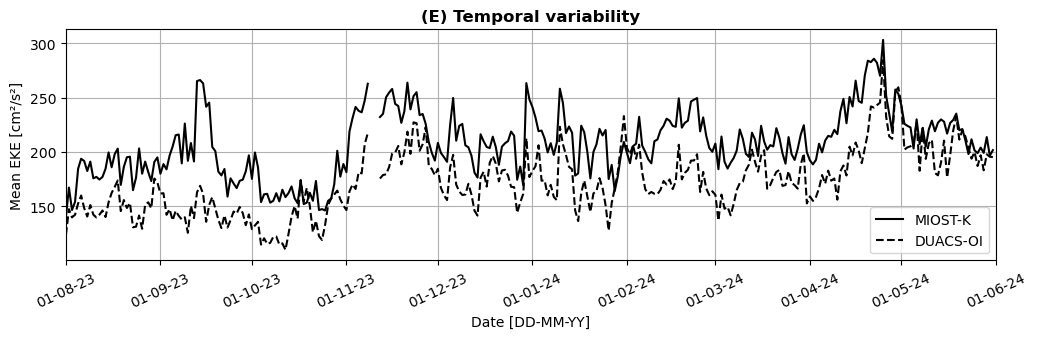

In [58]:
import matplotlib.dates as mdates
import datetime as dt

plt.figure(figsize=(12,3))
ax1=plt.subplot(111)
plt.plot(ndates, eke_merged_m_mean, 'k', label='MIOST-K')
plt.plot(ndates, eke_merged_d_mean, '--k', label='DUACS-OI')
plt.grid()

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

# Optional: Rotate date labels for better readability
plt.xticks(rotation=25)

# Set x-limits using datetime objects
ax1.set_xlim(dt.datetime(2023, 8, 1), dt.datetime(2024, 6, 1))

plt.xlabel("Date [DD-MM-YY]")
plt.ylabel("Mean EKE [cm²/s²]")
plt.title("(E) Temporal variability", fontweight="bold")
plt.legend(loc=4)


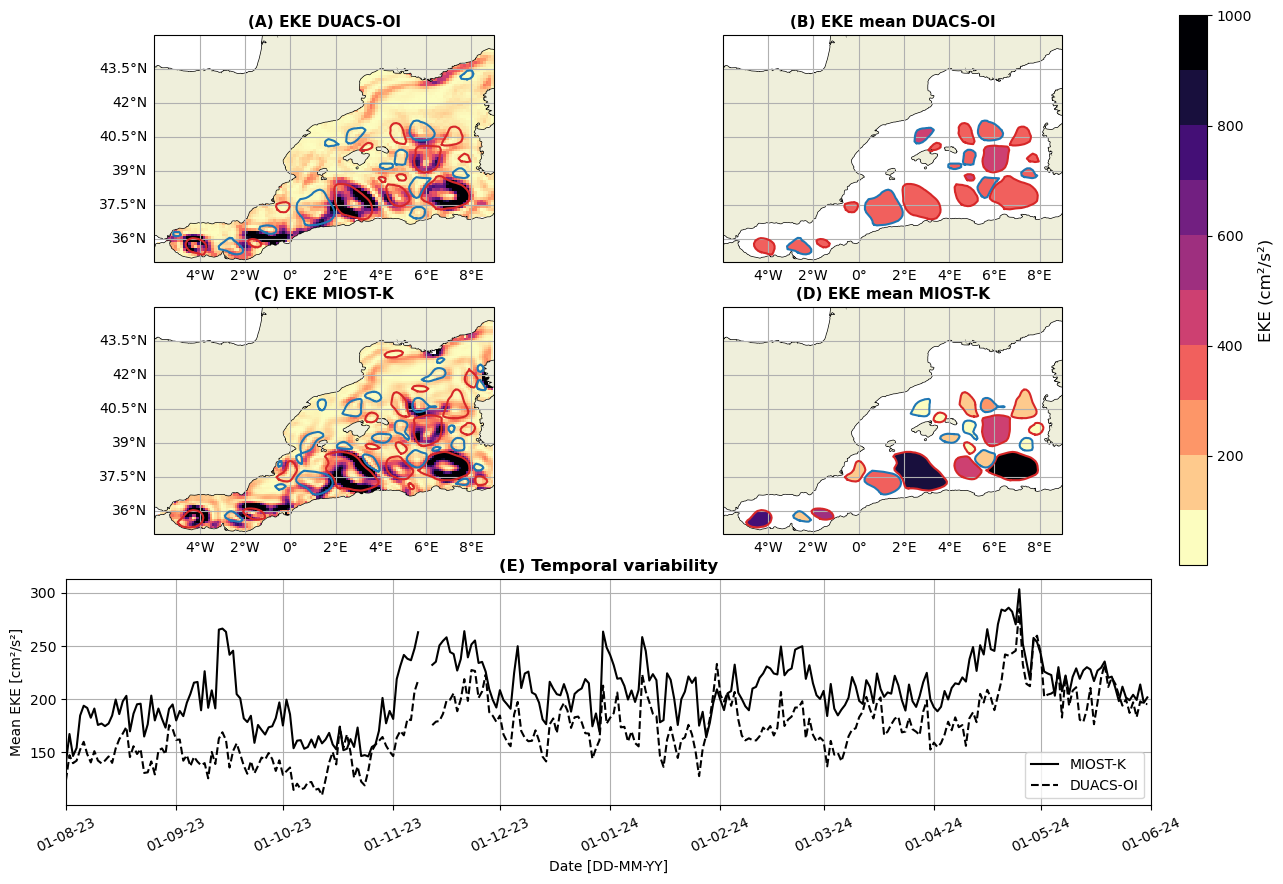

In [62]:
# Prepare the figure and gridspec
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], height_ratios=[1,1,1], wspace=0.1, hspace=0.2)

# Example list of eddy time steps or identifiers
j_list = [j_, j_, j_, j_]  # Replace with your actual keys
eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

# Store the last mappable for the shared colorbar
mappables = []

# for idx, j_ in enumerate(j_list):
#     print(idx)
########### 1
ax = start_axes_map_gridspec(fig, gs[0], f"(A) EKE DUACS-OI")
# eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
# m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
# mappables.append(m)
m = DUACS_map.display(ax, "eke", **eke_kwargs)
a_DUACS_NRT_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

########### 2
ax = start_axes_map_gridspec(fig, gs[1], f"(B) EKE mean DUACS-OI", right_gl=True)
a_DUACS_NRT_20240420.index(ja_).display(ax, color="C3", linestyle='-', lw=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.index(jc_).display(ax, color="C0", linestyle='-', lw=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

eke_merged_d = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
mappables.append(m)

########### 3
ax = start_axes_map_gridspec(fig, gs[2], f"(C) EKE MIOST-K")
# eke_merged_m_max = merge_m.index(i_).interp_grid(aviso_map, "eke", method="mean", intern=False)
# m = merge_m.index(i_).filled(ax, eke_merged_m_max, ref=-10, **eke_kwargs)
# mappables.append(m)
m = aviso_map.display(ax, "eke", **eke_kwargs)
a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_MIOST_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

########### 4
ax = start_axes_map_gridspec(fig, gs[3], f"(D) EKE mean MIOST-K", right_gl=True)
# a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True)
a_MIOST_20240420.index(ia_).display(ax, color="C3", linestyle='-', lw=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_MIOST_20240420.index(ic_).display(ax, color="C0", linestyle='-', lw=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

eke_merged_m = merge_m.index(i_).interp_grid(aviso_map, "eke", method="mean", intern=False)
m = merge_m.index(i_).filled(ax, eke_merged_m, ref=-10, **eke_kwargs)
mappables.append(m)

# ax.text(0.98, 0.02, '20/04/2024', transform=ax.transAxes,
#                 fontsize=10, ha='right', va='bottom',
#                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

########################################################################
# Add a shared colorbar on the right side of all subplots
cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.55])  # [left, bottom, width, height]
cb = fig.colorbar(mappables[-1], cax=cbar_ax)
cb.set_label('EKE (cm²/s²)', fontsize=12)

########### Time plot
ax1 = plt.subplot(gs[2,:]) 
plt.plot(ndates, eke_merged_m_mean, 'k', label='MIOST-K')
plt.plot(ndates, eke_merged_d_mean, '--k', label='DUACS-OI')
plt.grid()

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

# Optional: Rotate date labels for better readability
plt.xticks(rotation=25)

# Set x-limits using datetime objects
ax1.set_xlim(dt.datetime(2023, 8, 1), dt.datetime(2024, 6, 1))

plt.xlabel("Date [DD-MM-YY]")
plt.ylabel("Mean EKE [cm²/s²]")
plt.title("(E) Temporal variability", fontweight="bold")
plt.legend(loc=4)

# Add a common figure title
# plt.suptitle("Eddy Kinetic Energy (EKE) Maps", fontsize=16, weight='bold')
plt.show()

### Adjusting width:

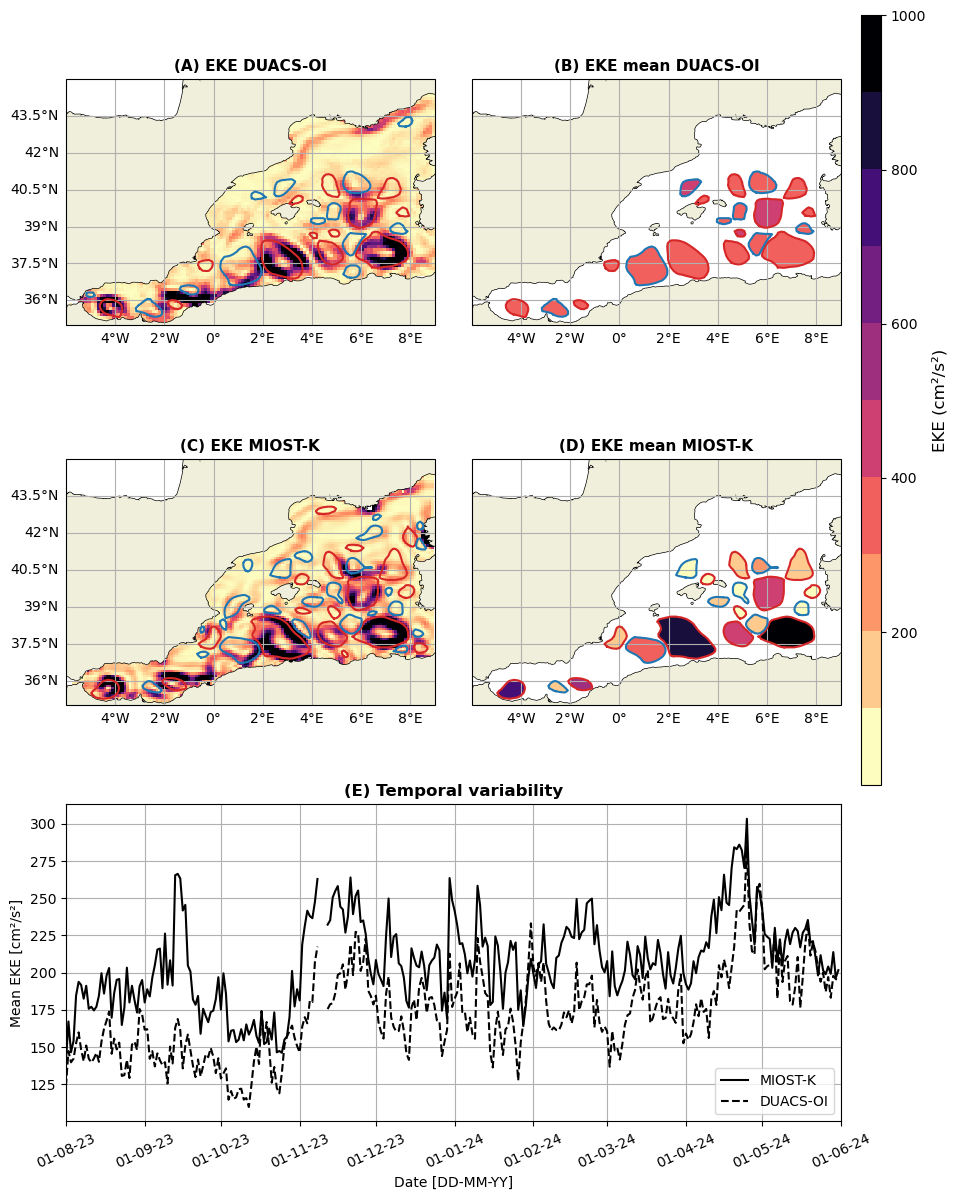

In [63]:
# Prepare the figure and gridspec
fig = plt.figure(figsize=(10, 14))
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], height_ratios=[1,1,1], wspace=0.1, hspace=0.2)

# Example list of eddy time steps or identifiers
j_list = [j_, j_, j_, j_]  # Replace with your actual keys
eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

# Store the last mappable for the shared colorbar
mappables = []

# for idx, j_ in enumerate(j_list):
#     print(idx)
########### 1
ax = start_axes_map_gridspec(fig, gs[0], f"(A) EKE DUACS-OI")
# eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
# m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
# mappables.append(m)
m = DUACS_map.display(ax, "eke", **eke_kwargs)
a_DUACS_NRT_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

########### 2
ax = start_axes_map_gridspec(fig, gs[1], f"(B) EKE mean DUACS-OI", right_gl=True)
a_DUACS_NRT_20240420.index(ja_).display(ax, color="C3", linestyle='-', lw=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.index(jc_).display(ax, color="C0", linestyle='-', lw=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

eke_merged_d = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
mappables.append(m)

########### 3
ax = start_axes_map_gridspec(fig, gs[2], f"(C) EKE MIOST-K")
# eke_merged_m_max = merge_m.index(i_).interp_grid(aviso_map, "eke", method="mean", intern=False)
# m = merge_m.index(i_).filled(ax, eke_merged_m_max, ref=-10, **eke_kwargs)
# mappables.append(m)
m = aviso_map.display(ax, "eke", **eke_kwargs)
a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_MIOST_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

########### 4
ax = start_axes_map_gridspec(fig, gs[3], f"(D) EKE mean MIOST-K", right_gl=True)
# a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True)
a_MIOST_20240420.index(ia_).display(ax, color="C3", linestyle='-', lw=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_MIOST_20240420.index(ic_).display(ax, color="C0", linestyle='-', lw=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())

eke_merged_m = merge_m.index(i_).interp_grid(aviso_map, "eke", method="mean", intern=False)
m = merge_m.index(i_).filled(ax, eke_merged_m, ref=-10, **eke_kwargs)
mappables.append(m)

# ax.text(0.98, 0.02, '20/04/2024', transform=ax.transAxes,
#                 fontsize=10, ha='right', va='bottom',
#                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

########################################################################
# Add a shared colorbar on the right side of all subplots
cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.55])  # [left, bottom, width, height]
cb = fig.colorbar(mappables[-1], cax=cbar_ax)
cb.set_label('EKE (cm²/s²)', fontsize=12)

########### Time plot
ax1 = plt.subplot(gs[2,:]) 
plt.plot(ndates, eke_merged_m_mean, 'k', label='MIOST-K')
plt.plot(ndates, eke_merged_d_mean, '--k', label='DUACS-OI')
plt.grid()

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

# Optional: Rotate date labels for better readability
plt.xticks(rotation=25)

# Set x-limits using datetime objects
ax1.set_xlim(dt.datetime(2023, 8, 1), dt.datetime(2024, 6, 1))

plt.xlabel("Date [DD-MM-YY]")
plt.ylabel("Mean EKE [cm²/s²]")
plt.title("(E) Temporal variability", fontweight="bold")
plt.legend(loc=4)

# Add a common figure title
# plt.suptitle("Eddy Kinetic Energy (EKE) Maps", fontsize=16, weight='bold')
plt.show()

## Subplots:

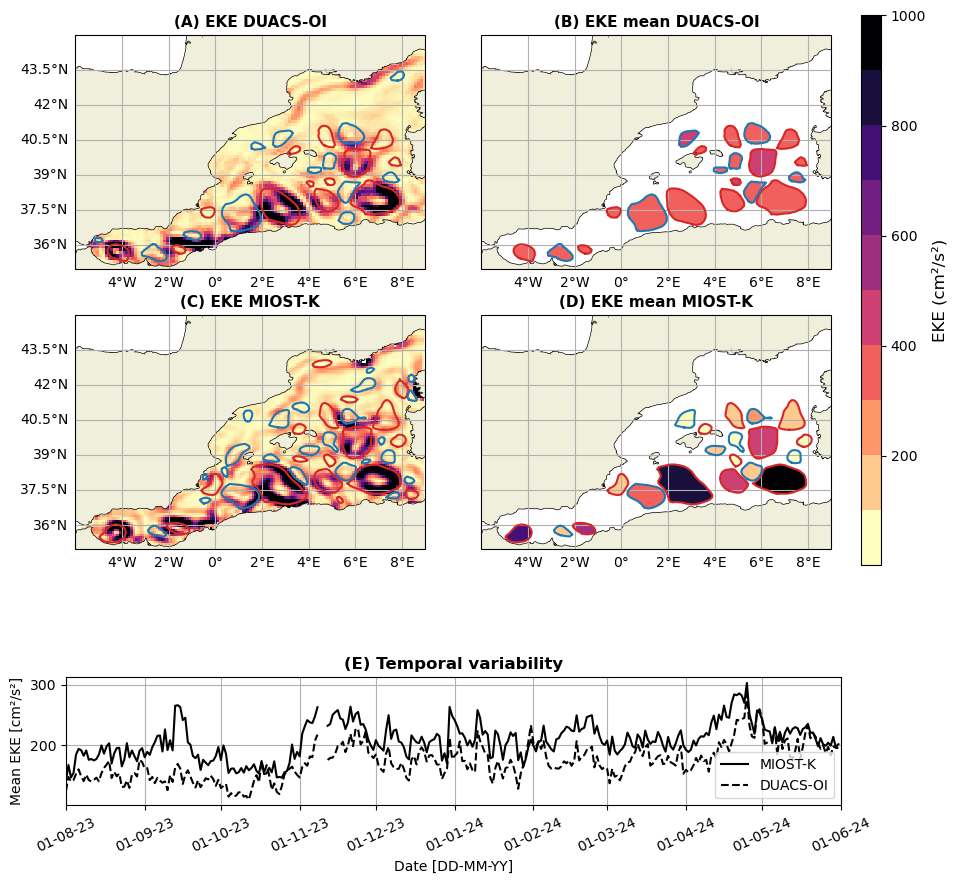

In [66]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Create figure
fig = plt.figure(figsize=(10, 10))

# Outer GridSpec: 2 rows, one for maps (2x2), one for timeseries
outer = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0.4)

# Inner GridSpec for (A)-(D)
gs0 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer[0], wspace=0.1, hspace=0.2)

# Single row GridSpec for (E)
gs01 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[1])

# Plot (A)
ax = start_axes_map_gridspec(fig, gs0[0, 0], f"(A) EKE DUACS-OI")
m = DUACS_map.display(ax, "eke", **eke_kwargs)
a_DUACS_NRT_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
mappables.append(m)

# Plot (B)
ax = start_axes_map_gridspec(fig, gs0[0, 1], f"(B) EKE mean DUACS-OI", right_gl=True)
a_DUACS_NRT_20240420.index(ja_).display(ax, color="C3", linestyle='-', lw=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_DUACS_NRT_20240420.index(jc_).display(ax, color="C0", linestyle='-', lw=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
mappables.append(m)

# Plot (C)
ax = start_axes_map_gridspec(fig, gs0[1, 0], f"(C) EKE MIOST-K")
m = aviso_map.display(ax, "eke", **eke_kwargs)
a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_MIOST_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
mappables.append(m)

# Plot (D)
ax = start_axes_map_gridspec(fig, gs0[1, 1], f"(D) EKE mean MIOST-K", right_gl=True)
a_MIOST_20240420.index(ia_).display(ax, color="C3", linestyle='-', lw=1.5, label="Anticyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
c_MIOST_20240420.index(ic_).display(ax, color="C0", linestyle='-', lw=1.5, label="Cyclonic", ref=-10, extern_only=True, transform=ccrs.PlateCarree())
m = merge_m.index(i_).filled(ax, eke_merged_m, ref=-10, **eke_kwargs)
mappables.append(m)

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.55])
cb = fig.colorbar(mappables[-1], cax=cbar_ax)
cb.set_label('EKE (cm²/s²)', fontsize=12)

# Plot (E)
ax1 = fig.add_subplot(gs01[0])
ax1.plot(ndates, eke_merged_m_mean, 'k', label='MIOST-K')
ax1.plot(ndates, eke_merged_d_mean, '--k', label='DUACS-OI')
ax1.grid()
ax1.set_title("(E) Temporal variability", fontweight="bold")
ax1.set_xlabel("Date [DD-MM-YY]")
ax1.set_ylabel("Mean EKE [cm²/s²]")
ax1.set_xlim(dt.datetime(2023, 8, 1), dt.datetime(2024, 6, 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.xticks(rotation=25)
ax1.legend(loc=4)

plt.show()


# --> problem with colour of eddies right panels!!

# To do below:

# Merged max:

In [ ]:
# Prepare the figure and gridspec
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1], wspace=0.1, hspace=0.2)

# Example list of eddy time steps or identifiers
j_list = [j_, j_, j_, j_]  # Replace with your actual keys
eke_kwargs = dict(vmin=1, vmax=1000, cmap="magma_r", transform=ccrs.PlateCarree())

# Store the last mappable for the shared colorbar
mappables = []

# for idx, j_ in enumerate(j_list):
#     print(idx)
########### 1
ax = start_axes_map_gridspec(fig, gs[0], f"(A) EKE DUACS-OI")
# eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
# m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
# mappables.append(m)
m = DUACS_map.display(ax, "eke", **eke_kwargs)
a_DUACS_NRT_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True)
c_DUACS_NRT_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True)

########### 2
ax = start_axes_map_gridspec(fig, gs[1], f"(B) EKE mean DUACS-OI", right_gl=True)
eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
mappables.append(m)

########### 3
ax = start_axes_map_gridspec(fig, gs[2], f"(C) EKE MIOST-K")
# eke_merged_m_max = merge_m.index(i_).interp_grid(aviso_map, "eke", method="mean", intern=False)
# m = merge_m.index(i_).filled(ax, eke_merged_m_max, ref=-10, **eke_kwargs)
# mappables.append(m)
m = aviso_map.display(ax, "eke", **eke_kwargs)
a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True)
c_MIOST_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True)

########### 4
ax = start_axes_map_gridspec(fig, gs[3], f"(D) EKE mean MIOST-K", right_gl=True)
a_MIOST_20240420.display(ax, color="C3", linestyle='-', linewidth=1.5, label="Anticyclonic", ref=-10, extern_only=True)
c_MIOST_20240420.display(ax, color="C0", linestyle='-', linewidth=1.5, label="Cyclonic", ref=-10, extern_only=True)

eke_merged_d_max = merge_d.index(j_).interp_grid(DUACS_map, "eke", method="mean", intern=False)
m = merge_d.index(j_).filled(ax, eke_merged_d_max, ref=-10, **eke_kwargs)
mappables.append(m)

# ax.text(0.98, 0.02, '20/04/2024', transform=ax.transAxes,
#                 fontsize=10, ha='right', va='bottom',
#                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

########################################################################
# Add a shared colorbar on the right side of all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = fig.colorbar(mappables[-1], cax=cbar_ax)
cb.set_label('EKE (cm²/s²)', fontsize=12)

# Add a common figure title
# plt.suptitle("Eddy Kinetic Energy (EKE) Maps", fontsize=16, weight='bold')
plt.show()

In [47]:
a_DUACS_NRT_20240420.display?

/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/py_eddy_tracker/observations/observation.py:302: RuntimeWarning: invalid value encountered in true_divide
  v /= hist_numba(x, bins=bins)[0]


Signature:
a_DUACS_NRT_20240420.display(
    ax,
    ref=None,
    extern_only=False,
    intern_only=False,
    **kwargs,
)
Docstring:
Plot the speed and effective (dashed) contour of the eddies

:param matplotlib.axes.Axes ax: matplotlib axe used to draw
:param float,None ref: if defined, all coordinates are wrapped with ref as western boundary
:param bool extern_only: if True, draw only the effective contour
:param bool intern_only: if True, draw only the speed contour
:param dict kwargs: look at :py:meth:`matplotlib.axes.Axes.plot`

.. minigallery:: py_eddy_tracker.EddiesObservations.display
File:      /opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/py_eddy_tracker/observations/observation.py
Type:      method

In [11]:
pip show pyEddyTracker


Name: pyEddyTracker
Version: 3.6.1
Summary: Py-Eddy-Tracker libraries
Home-page: 
Author: emason & adelepoulle
Author-email: emason@imedea.uib-csic.es
License: 
Location: /opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages
Requires: matplotlib, netCDF4, numba, numpy, opencv-python, pint, polygon3, pyyaml, requests, scipy, zarr
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [12]:
conda list pyEddyTracker


# packages in environment at /opt/anaconda3/envs/venv_py-eddy-tracker_05:
#
# Name                    Version                   Build  Channel
pyeddytracker             3.6.1                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [13]:
conda list geopandas

# packages in environment at /opt/anaconda3/envs/venv_py-eddy-tracker_05:
#
# Name                    Version                   Build  Channel

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install --upgrade pyEddyTracker


  Using cached pyEddyTracker-3.6.1-py3-none-any.whl.metadata (3.4 kB)
  Using cached Pint-0.18-py2.py3-none-any.whl.metadata (7.1 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of zarr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.0 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 6.8 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 9.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━